In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
data=pd.read_csv(r'C:\Users\rucha\Documents\Dataset\SoilMoisture_data1.csv')
data.head()

,Date,Time,crop,SoilMoisture,Irrigation_Action
0,01-01-2021,00:00:00,soyabin,23.4,1
1,02-01-2021,01:00:00,soyabin,24.2,1
2,03-01-2021,02:00:00,soyabin,27.1,1
3,04-01-2021,03:00:00,soyabin,29.8,1
4,05-01-2021,04:00:00,soyabin,30.7,1


In [11]:
x=data.iloc[:,3].values


In [12]:
x.shape

(803,)

In [13]:

y = data['Irrigation_Action'].values

In [14]:
y.shape

(803,)

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [16]:
x_train.shape

(642,)

In [17]:
x_test.shape

(161,)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [19]:
# Reshape the data if it has a single feature
x_train = x_train.reshape(-1, 1)
x_train=scaler.fit_transform(x_train)
x_train

array([[-1.28454031],
       [-0.21712064],
       [-1.51293423],
       [-1.43499566],
       [ 1.06920477],
       [-0.18120113],
       [ 0.07701277],
       [ 1.31589732],
       [-0.22254246],
       [ 1.01159799],
       [-1.41737476],
       [-1.06766774],
       [ 0.43485251],
       [-1.1273077 ],
       [ 0.1230982 ],
       [ 0.42536434],
       [ 0.08717868],
       [-0.81148702],
       [ 0.80895769],
       [-1.05275776],
       [ 1.61138619],
       [-0.89755832],
       [ 0.94043668],
       [ 0.90316171],
       [ 0.22340176],
       [-1.42821839],
       [ 0.74457365],
       [-0.96465328],
       [-1.42279657],
       [-0.29641468],
       [-1.24523216],
       [ 0.47348294],
       [-0.47736773],
       [-0.88264834],
       [-0.52751951],
       [-1.23845489],
       [-1.25743124],
       [-1.1957581 ],
       [-0.11275072],
       [ 1.66086024],
       [ 0.02076145],
       [ 1.12003428],
       [-0.86096108],
       [-0.44551457],
       [-0.9348333 ],
       [ 1

In [20]:
x_test = x_test.reshape(-1, 1)
x_test=scaler.transform(x_test)
x_test

array([[-1.18423675],
       [ 1.4826181 ],
       [ 1.12003428],
       [-1.22151172],
       [-1.32655937],
       [-0.82843019],
       [-0.32420147],
       [-0.96736418],
       [ 0.88621854],
       [ 0.40571026],
       [-0.05311077],
       [ 0.22611266],
       [ 0.57446423],
       [-0.26456152],
       [ 0.31692805],
       [ 0.32099441],
       [ 1.6723816 ],
       [-1.29131758],
       [ 1.20339467],
       [ 1.54293578],
       [ 0.82996722],
       [ 0.52634562],
       [-1.26691942],
       [-0.39332961],
       [ 0.72695275],
       [-0.41230596],
       [ 0.27965308],
       [ 0.29185216],
       [ 0.21594676],
       [ 0.0092401 ],
       [ 0.58530785],
       [ 0.75948363],
       [ 0.37453483],
       [-1.02226005],
       [ 1.18712923],
       [ 0.06210279],
       [-1.0236155 ],
       [ 0.4877152 ],
       [-0.18458976],
       [-0.8589279 ],
       [ 0.49517019],
       [-1.33672527],
       [-1.70202   ],
       [-0.20627702],
       [ 0.81099087],
       [-0

In [21]:
#1 st method
np.sqrt(x_train.shape[0])

25.337718918639855

In [22]:
k=25

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=k)

In [24]:
#tain our model
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [25]:
y_pred=knn.predict(x_test)

In [26]:
y_pred.shape

(161,)

In [27]:
y_test.shape

(161,)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[  8,   0],
       [  0, 153]], dtype=int64)

In [71]:
# 2nd method 
accuracy=[]
for i in range(1,154):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(x_test)))
    

In [72]:
len(accuracy)

153

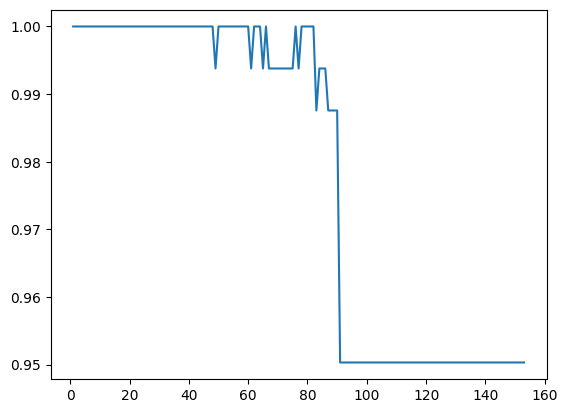

In [73]:
plt.plot(range(1,154),accuracy)

In [74]:
 knn=KNeighborsClassifier(n_neighbors=5)

In [75]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [76]:
y_pred=knn.predict(x_test)

In [77]:
accuracy_score(y_test,y_pred)

1.0

In [83]:
def predict_output(scaler, knn_model, threshold_min=24, threshold_max=70):
    soil_moisture = float(input("Enter the soil moisture: "))
    
    #if soil_moisture > threshold_max:
        #return "Valve off"
    #elif soil_moisture <= threshold_min:
        #return "Valve on"
    
    x_new = np.array([soil_moisture]).reshape(1, -1)
    x_new = scaler.transform(x_new)
    prediction = knn_model.predict(x_new)[0]
    return "stop valve water supply" if prediction == 0 else "valve on"
        


        
   
   

In [84]:
result = predict_output(scaler, knn, threshold_min=24, threshold_max=70)
print(result)

Enter the soil moisture:  23


valve on
